# Importing Libraries

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [25]:
#!pip install tables


In [26]:
import time
from joblib import dump, load


# Importing test Data and Random_Forest Model

In [27]:
rf_classifier = load('rf_classifier_main_test_right_correlation.joblib')


In [29]:
columns_to_drop = load('columns_to_drop.joblib')


In [40]:
test_df = pd.read_csv('miniTest.txt',sep=' ')


In [41]:
test_df.dropna(inplace=True)

In [42]:
# test_df.drop(columns=columns_to_drop,inplace=True) #Uncomment this line if you are thresholding features

In [44]:
X_test = test_df.drop(columns=['Classification'])


y_test = test_df['Classification']

In [45]:
X_test

,//X,Y,Z,R,G,B,Planarity_(0.1),Linearity_(0.1),PCA1_(0.1),Sphericity_(0.1),...,Anisotropy_(0.25),Surface_variation_(0.25),Eigenvalues_sum_(0.1),Omnivariance_(0.1),Eigenentropy_(0.1),Anisotropy_(0.1),Surface_variation_(0.1),Nx,Ny,Nz
0,513858.463013,5.426745e+06,243.942001,10,13,20,0.759552,0.236927,0.566061,0.003520,...,0.886161,0.060181,0.005770,0.000454,0.033766,0.996480,0.001993,0.528010,0.501191,0.685575
1,513858.411987,5.426745e+06,244.067001,7,5,16,0.192416,0.754367,0.769912,0.053217,...,0.882109,0.070813,0.003444,0.000625,0.021758,0.946783,0.040973,0.496379,0.526462,0.690251
2,513858.416992,5.426745e+06,244.063995,7,5,16,0.804378,0.162752,0.534726,0.032870,...,0.848509,0.083887,0.005223,0.000843,0.031443,0.967130,0.017576,0.541481,0.491188,0.682299
3,513858.463013,5.426745e+06,244.063995,7,5,16,0.782621,0.213573,0.558586,0.003807,...,0.866725,0.072027,0.003742,0.000301,0.023529,0.996193,0.002126,0.605765,0.435550,0.665841
4,513858.504028,5.426745e+06,244.072998,7,5,16,0.698267,0.298336,0.586489,0.003397,...,0.900436,0.059940,0.001959,0.000153,0.013567,0.996603,0.001992,0.699010,0.337284,0.630575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729762,513862.342041,5.426769e+06,245.734009,74,81,89,0.830364,0.163252,0.542555,0.006383,...,0.998746,0.000654,0.005019,0.000476,0.030138,0.993617,0.003463,0.811095,0.189508,0.553364
3729763,513862.299988,5.426769e+06,245.735001,62,70,73,0.835547,0.158056,0.541026,0.006397,...,0.998694,0.000704,0.004864,0.000461,0.029358,0.993603,0.003461,0.803859,0.203644,0.558873
3729764,513862.247986,5.426769e+06,245.722000,61,73,99,0.776619,0.216284,0.558406,0.007096,...,0.998721,0.000728,0.004843,0.000479,0.029248,0.992904,0.003963,0.796517,0.214151,0.565420
3729765,513862.197998,5.426769e+06,245.719009,68,80,106,0.680730,0.312632,0.590317,0.006638,...,0.998560,0.000806,0.004331,0.000424,0.026598,0.993362,0.003918,0.820723,0.172547,0.544648


In [46]:
y_pred = rf_classifier.predict(X_test)

y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8164221713884292


In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.8011969037132088


In [49]:
from sklearn.metrics import f1_score

f1_per_class = f1_score(y_test, y_pred, average=None)
print("F1-score for each class:")
for i, f1_class in enumerate(f1_per_class):
    print(f"Class {i}: {f1_class}")

F1-score for each class:
Class 0: 0.12107020909982653
Class 1: 0.806951511492766
Class 2: 0.14052860852363913
Class 3: 0.11306485157874836
Class 4: 0.9643420353065215
Class 5: 0.7706303635186771
Class 6: 0.3505278735652531
Class 7: 0.863801522283831
Class 8: 0.0
Class 9: 0.0008151857458949575
Class 10: 0.06703973139339676


In [52]:
test_df.to_csv('mini_Testing.txt', sep='\t', index=False)


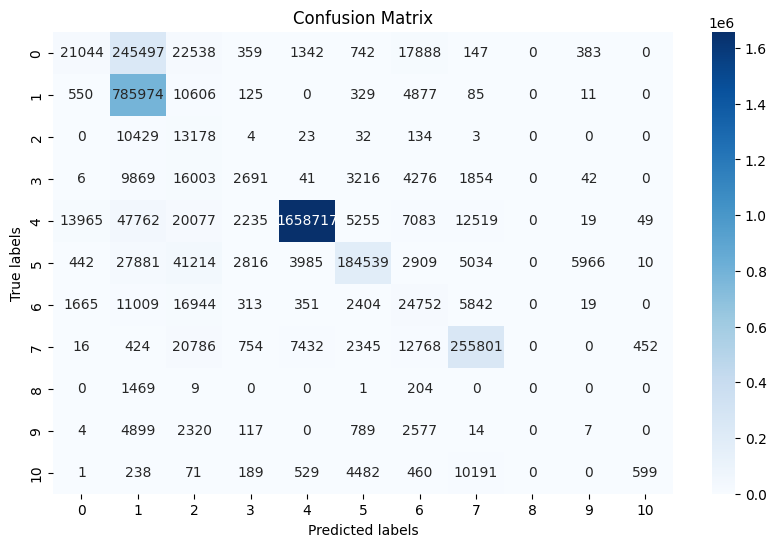

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()